In [66]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_learning_curves
import warnings
warnings.filterwarnings('ignore')

In [5]:
data =pd.read_csv('/Users/maxkim/Desktop/DS Camp/Mini Project/Capstone Project/adjusted_data.csv')
data =data.drop('Unnamed: 0', axis =1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


### Feature Engineering

<AxesSubplot:>

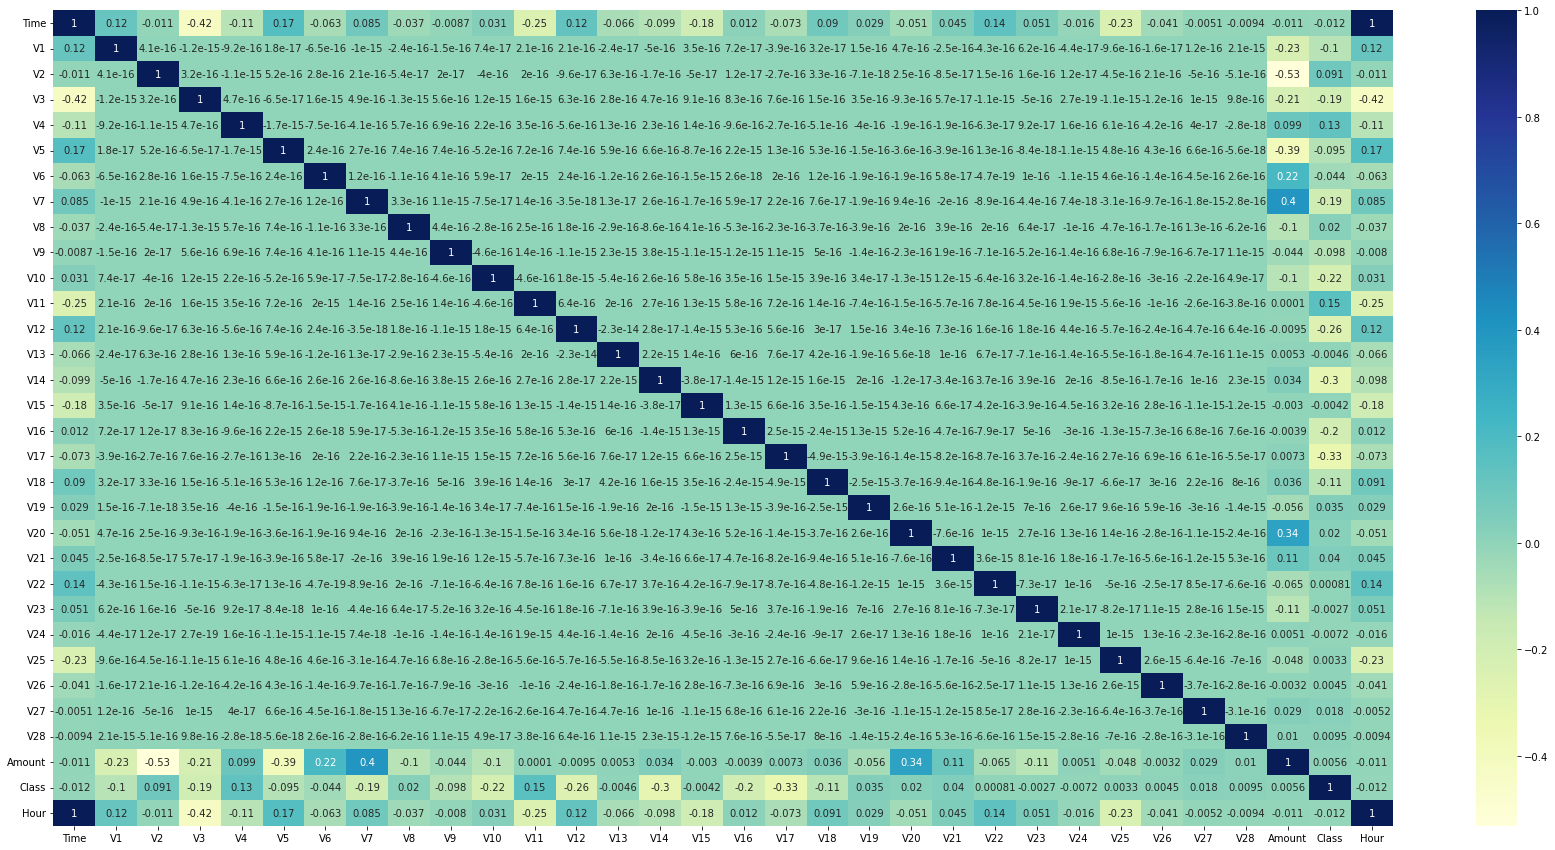

In [7]:
# Data Correlation
corr =data.corr()
plt.figure(figsize =(30, 15))
sns.heatmap(corr, annot =True, cmap="YlGnBu")

In [8]:
# Since hour and time has correlation of 1, will drop hour from the columns
data =data.drop('Hour', axis =1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
X = data.drop('Class', axis=1)
y = data.Class

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state =1)

In [10]:
# Scale since Time and Amount and Hour needs to be scaled as well
sc = StandardScaler()
X_train = sc.fit_transform(X_train)                 # fit_transform: fit(μ and σ calculation) + transform
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [15]:
# Dealing with imbalanced data
y_train.value_counts()

0    227440
1       405
Name: Class, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
y_train.value_counts()

0    227440
1    227440
Name: Class, dtype: int64

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(454880, 30)
(56962, 30)
(454880,)
(56962,)


### Modelling

In [18]:
def show_summary_report(actual, prediction, probabilities, model_name):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')
    ax[2].grid(alpha = 0.5)
    ax[1].grid(alpha = 0.5)

    plt.show

In [20]:
# Logistic Regression with GridSearch
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lgr = LogisticRegression()
lgrGS =GridSearchCV(lgr, lr_params, cv =5)
lgrGS.fit(X_train, y_train)
lgrGS_best =lgrGS.best_estimator_
print(lgrGS_best)

LogisticRegression(C=10)


Accuracy : 0.9793 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0618 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8851 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9785                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


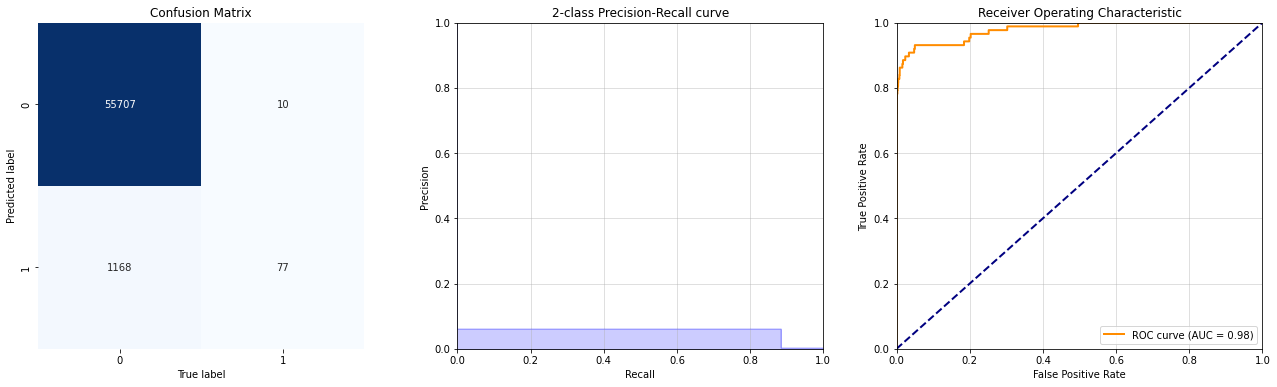

In [21]:
# Logistic Regression with test dataset
lgrGS =LogisticRegression(C = 10)
lgrGS.fit(X_train, y_train)
lgr_y_test_pred =lgrGS.predict(X_test)
lgr_y_test_prob =lgrGS.predict_proba(X_test)

show_summary_report(y_test, lgr_y_test_pred, lgr_y_test_prob, 'Logistic Regression (C =10)')



Accuracy : 0.9536 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9779 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9281 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9894                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


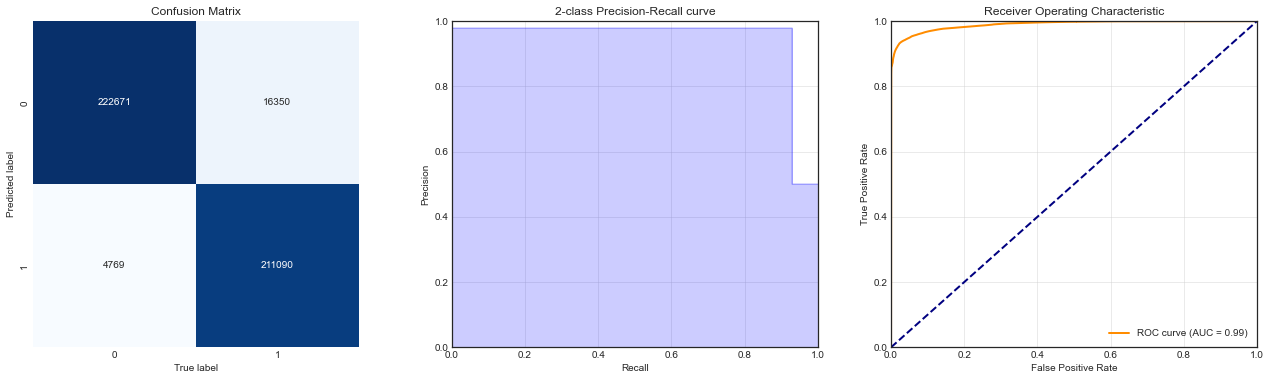

In [61]:
# Logistic Regression with train dataset
lgr_y_train_pred =lgrGS.predict(X_train)
lgr_y_train_prob =lgrGS.predict_proba(X_train)

show_summary_report(y_train, lgr_y_train_pred, lgr_y_train_prob, 'Logistic Regression (C =10)')

Optimal K of 1


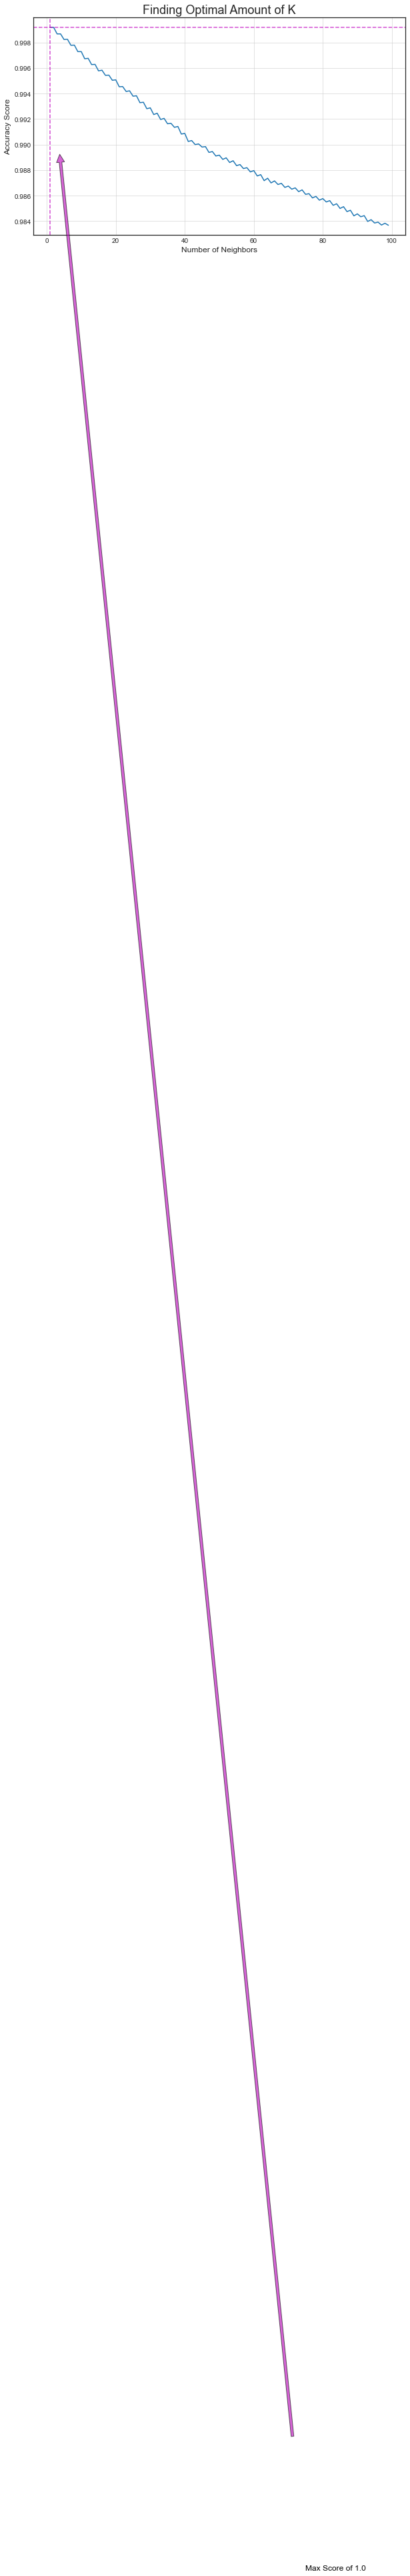

In [23]:
# KNN finding optimal K
n_neighbors = range(1,100)
scores = []

# Loop model
for i in n_neighbors:
    knn_tester = KNeighborsClassifier(n_neighbors=i)
    knn_tester.fit(X_train, y_train)
    scores.append(knn_tester.score(X_test, y_test))
    
# Plot   

# Styling
plt.figure(figsize = (10,6))
plt.style.use('seaborn-white')

# Plot
sns.lineplot(x = n_neighbors, y = scores, palette = 'magma')

# Grid
plt.grid(alpha = 0.7)

# Labels
plt.xlabel('Number of Neighbors', fontsize = 12)
plt.ylabel('Accuracy Score', fontsize = 12)
plt.title('Finding Optimal Amount of K', fontsize = 18)

# Annotations
plt.axhline(y = max(scores), color = 'm', linestyle = '--', alpha = 0.7)
plt.axvline(x = scores.index(max(scores))+1, color = 'm', linestyle = '--', alpha = 0.7)

# Annotate max score
plt.annotate(text = f'Max Score of {round(max(scores), 2)}',
             fontsize = 12, color = 'black',
             xy = (scores.index(max(scores)), max(scores)),
             xytext = (75, 0.80),
             arrowprops = dict(facecolor = 'm',
                              shrink = 0.05, alpha = 0.6)
            )

# Show
print(f'Optimal K of {scores.index(max(scores)) + 1}')
plt.show()


Accuracy : 0.9982 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4545 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8046 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9076                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


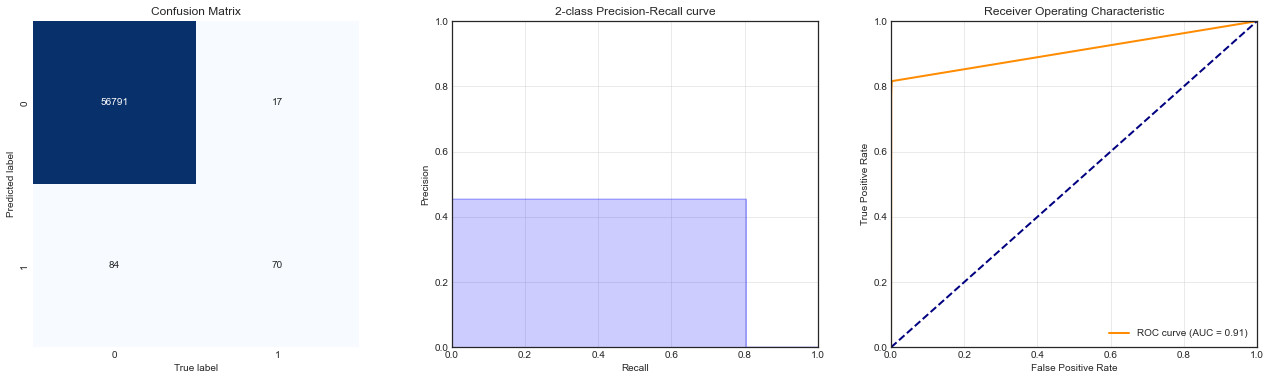

In [24]:
# KNN with base n_neighbors
knn =KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train, y_train)
knn_y_pred =knn.predict(X_test)
knn_y_prob =knn.predict_proba(X_test)
show_summary_report(y_test, knn_y_pred, knn_y_prob, 'KNN (5)')

Accuracy : 0.9992 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7128 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7701 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8848                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


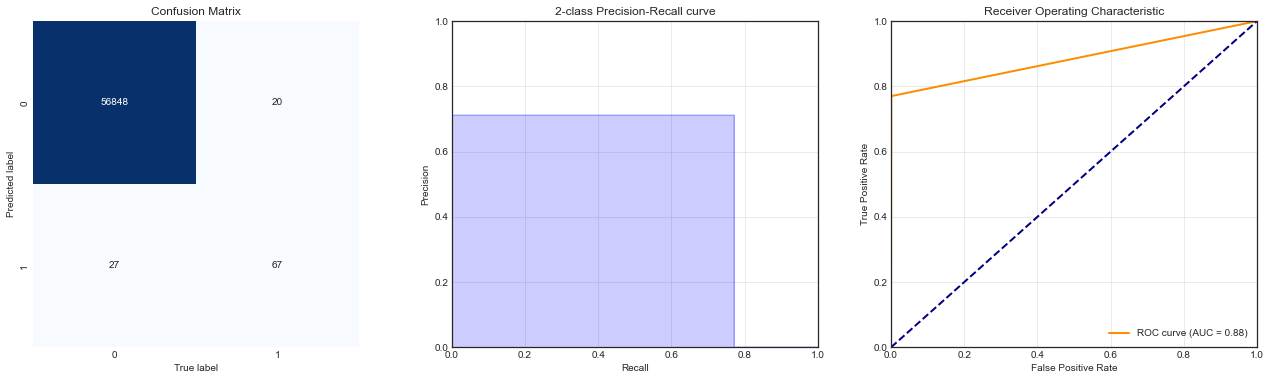

In [25]:
# KNN with optimal n_neighbors
# KNN with test dataset
knn =KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train, y_train)
knn_y_pred =knn.predict(X_test)
knn_y_prob =knn.predict_proba(X_test)
show_summary_report(y_test, knn_y_pred, knn_y_prob, 'KNN (1)')

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


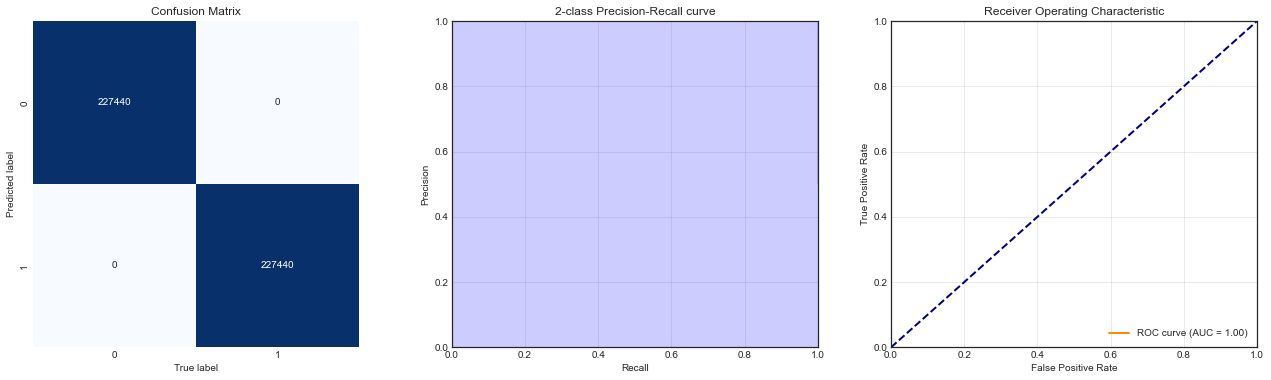

In [62]:
# KNN with train dataset
knn_y_train_pred =knn.predict(X_train)
knn_y_train_prob =knn.predict_proba(X_train)
show_summary_report(y_train, knn_y_train_pred, knn_y_train_prob, 'KNN (1)')

Accuracy : 0.9995 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8718 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7816 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9641                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


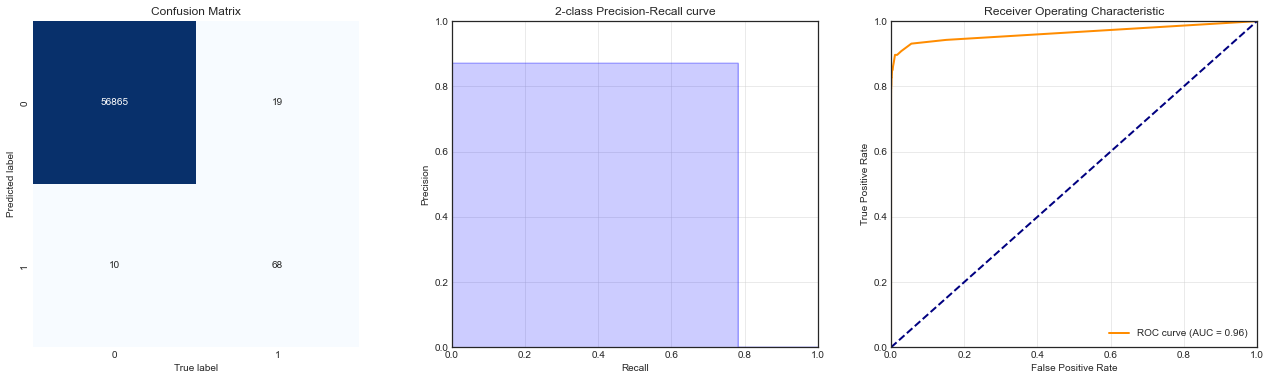

In [28]:
# Random Forest with test dataset
rf =RandomForestClassifier(random_state =42)
rf.fit(X_train, y_train)
rf_y_pred =rf.predict(X_test)
rf_y_prob =rf.predict_proba(X_test)
show_summary_report(y_test, rf_y_pred, rf_y_prob, 'Random Forest')

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


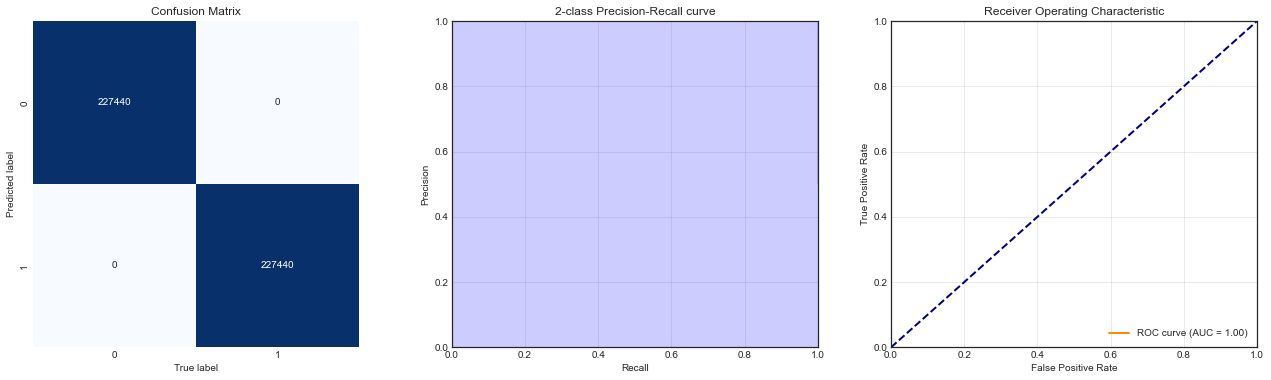

In [63]:
# Random Forest with train dataset
rf_y_train_pred =rf.predict(X_train)
rf_y_train_prob =rf.predict_proba(X_train)
show_summary_report(y_train, rf_y_train_pred, rf_y_train_prob, 'Random Forest')

Accuracy : 0.9993 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7667 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7931 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9770                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


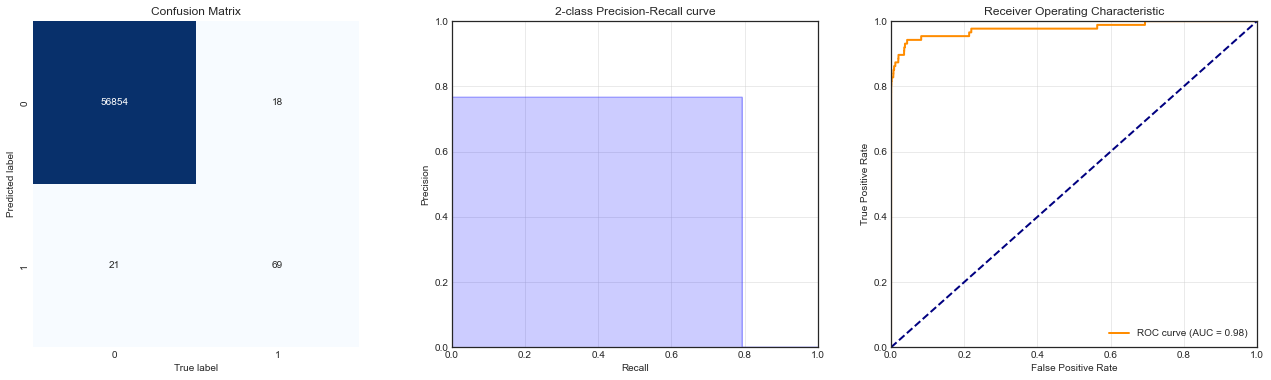

In [29]:
# XGBoost with test dataset
xgb_model = xgb.XGBClassifier(n_estimators = 5000, max_depth = 30, learning_rate = 0.01)
xgb_model.fit(X_train, y_train)
xgb_model_y_pred = xgb_model.predict(X_test)
xgb_model_y_proba = xgb_model.predict_proba(X_test)

show_summary_report(y_test, xgb_model_y_pred, xgb_model_y_proba, 'XGBoost')

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


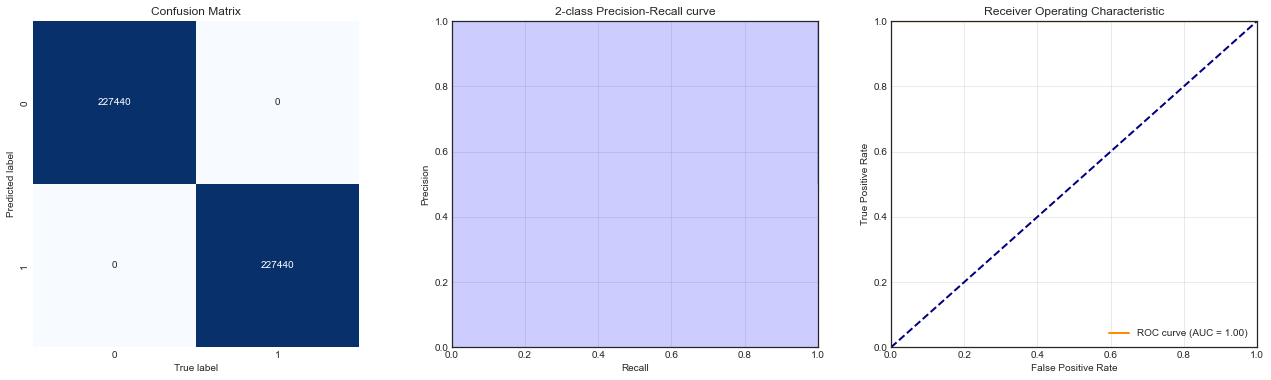

In [64]:
# XGBoost with train dataset
xgb_model_y_train_pred = xgb_model.predict(X_train)
xgb_model_y_train_proba = xgb_model.predict_proba(X_train)

show_summary_report(y_train, xgb_model_y_train_pred, xgb_model_y_train_proba, 'XGBoost')

Accuracy : 0.9788 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0591 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8621 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9584                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


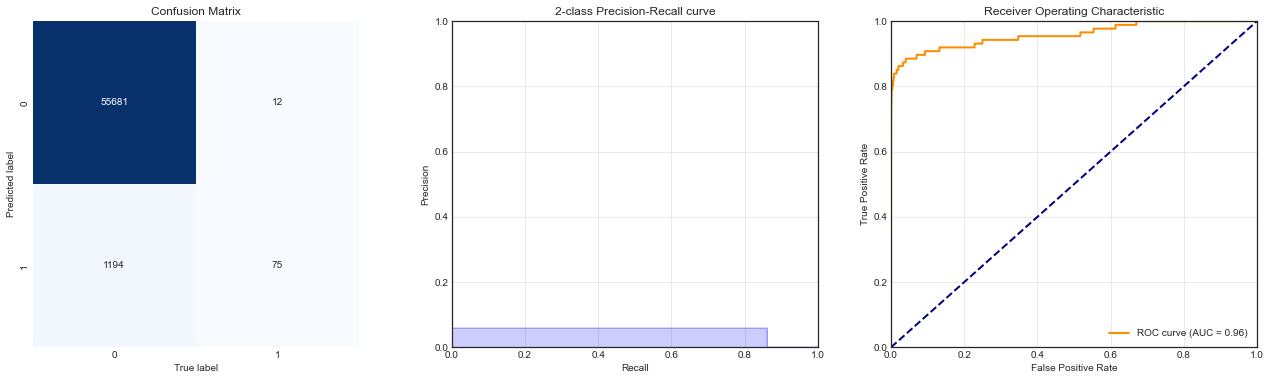

In [30]:
# AdaBoost with test dataset
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_model_y_pred = ada_model.predict(X_test)
ada_model_y_proba = ada_model.predict_proba(X_test)

show_summary_report(y_test, ada_model_y_pred, ada_model_y_proba, 'AdaBoost')

Accuracy : 0.9677 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9789 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9559 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9967                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


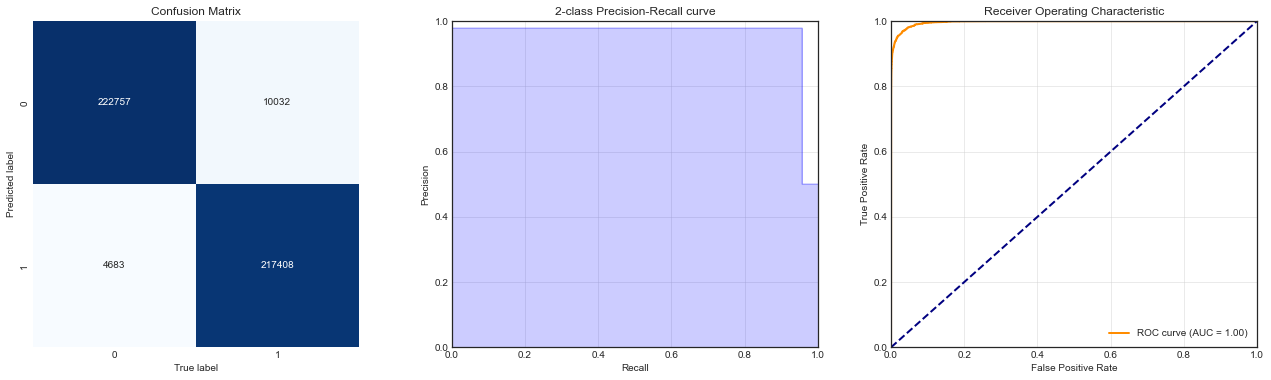

In [65]:
# AdaBoost with train dataset
ada_model_y_train_pred = ada_model.predict(X_train)
ada_model_y_train_proba = ada_model.predict_proba(X_train)

show_summary_report(y_train, ada_model_y_train_pred, ada_model_y_train_proba, 'AdaBoost')

- Logistic Regression with C=10 has highest accuracy and recall

In [59]:
# Top 10 variables that affect fraud
importance = pd.Series(lgrGS.coef_[0],
                 index=X.columns.values)
importance_top_10 =importance.sort_values(ascending =True)[-10:]
importance_top_10.head(10)

V19       0.247963
V23       0.331225
V11       0.496594
V3        0.547339
V22       0.591213
V2        0.978635
V5        1.069111
V4        1.212616
V1        1.485058
Amount    2.024915
dtype: float64

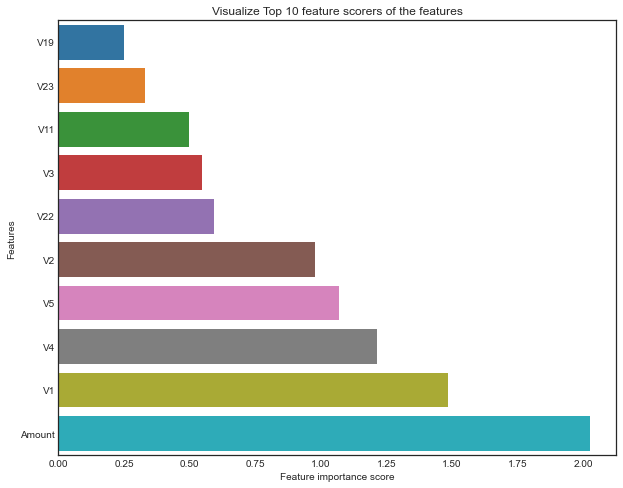

In [60]:
f, ax =plt.subplots(figsize=(10, 8))
ax =sns.barplot(x =importance_top_10, y =importance_top_10.index)
ax.set_title("Visualize Top 10 feature scorers of the features")
ax.set_xlabel('Feature importance score')
ax.set_ylabel('Features')
plt.show()